# KNN classification

In [1]:
#Importing libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
#Loading data

In [12]:
data=pd.read_csv('data_cleaned.csv')

In [13]:
data.shape

(891, 25)

In [14]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


# Segregating Variables : independent and Dependent variables

In [15]:
x=data.drop(['Survived'], axis=1)
y=data['Survived']
x.shape, y.shape

((891, 24), (891,))

# Scaling the data(Using MinMax Scaler)

In [16]:
##Importing the MinMax Scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
x_scaled=scaler.fit_transform(x)

In [20]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [21]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
##Importing the train test split function

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_x, test_x, train_y, test_y=train_test_split(x,y,random_state=56, stratify=y)

# Implementing the knn classifier

In [25]:
#importing KNN classifier and metric F1 score

In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [27]:
#Creating instance of KNN

In [28]:
clf=KNN(n_neighbors=5)

In [29]:
#fitting the model

In [30]:
clf.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test f1 score     ',k)

Test f1 score      0.6785714285714285


# Elbow for Classifier

In [33]:
def Elbow(K):
    #Initiating empty list
    test_error=[]
    #training model for every value of K
    for i in K:
        #instance of KNN
        clf=KNN( n_neighbors=i)
        clf.fit(train_x,train_y)
        #Appendinf f1 scores to empty list
        tmp=clf.predict(test_x)
        tmp=f1_score(tmp,test_y)
        error=1-tmp
        test_error.append(error)
        
    return test_error

In [34]:
#Defining K range
k=range(6,20,2)

In [35]:
test=Elbow(k)

In [36]:
test

[0.33333333333333326,
 0.2993630573248408,
 0.30434782608695654,
 0.2962962962962963,
 0.2962962962962963,
 0.29999999999999993,
 0.3125]

Text(0.5, 1.0, 'Elbow Curve for test')

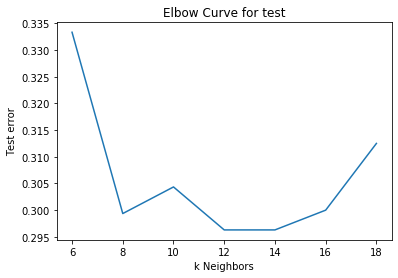

In [37]:
#plotting the curves
plt.plot(k,test)
plt.xlabel('k Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [37]:
#creaing instance of KNN
clf=KNN(n_neighbors=12)
# fitting the model
clf.fit(train_x, train_y)
# Predicting over the train set and calculating F1
test_predict=clf.predict(test_x)
k=f1_score(test_predict,test_y)
print('Test f1 score  ', k)

Test f1 score   0.7037037037037037


# KNN Regression

In [38]:
data=pd.read_csv('train_cleaned.csv')

In [39]:
data.shape

(8523, 46)

In [40]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [41]:
#Segregating variables : Dependent and Independent

In [42]:
x=data.drop(['Item_Outlet_Sales'], axis=1)

In [43]:
y=data['Item_Outlet_Sales']

In [44]:
x.shape
y.shape

(8523,)

In [45]:
x.shape

(8523, 45)

In [46]:
y.shape

(8523,)

# Scaling the data using MinMaxScaler

In [39]:
#Import
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x
                            )

In [40]:
x=pd.DataFrame(x_scaled)

In [41]:
x

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.367921,0.045771,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
#Importing train test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=56)


# Implementing KNN regressor

In [45]:
#Importing KNN Regressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [46]:
# Creating instance of KNN

In [47]:
reg=KNN(n_neighbors=5)

In [48]:
#Fitting the model
reg.fit(train_x,train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [49]:
#Predicting over the train
test_predict=reg.predict(test_x)
k=mse(test_predict, test_y)
print('Test MSE   ', k)

Test MSE    0.15820627802690584


# Elbow for classifier

In [56]:
def Elbow(K):
    test_mse=[]
    for i in K:
        reg=KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp=reg.predict(test_x)
        tmp=mse(tmp,test_y)
        test_mse.append(tmp)
        
    return test_mse

In [57]:
k=range(1,40)

In [58]:
Elbow(k)

[0.2645739910313901,
 0.18946188340807174,
 0.17937219730941703,
 0.16676008968609865,
 0.15820627802690584,
 0.14798206278026907,
 0.14349775784753363,
 0.140484865470852,
 0.13635608702873278,
 0.13475336322869957,
 0.1356038987510655,
 0.13129048330842052,
 0.12948762172632475,
 0.13002196394252766,
 0.12882909815645244,
 0.13067544843049328,
 0.1291448787375673,
 0.12773348834634335,
 0.12645491472367487,
 0.12753363228699552,
 0.12889580346338836,
 0.12968350442871437,
 0.1307145218578077,
 0.12941423766816143,
 0.12868161434977582,
 0.12986573619550507,
 0.13145349302133888,
 0.13174933650590281,
 0.13234298267597297,
 0.13256103637269556,
 0.13296594074744636,
 0.13352631025784753,
 0.13367264162209128,
 0.13259344888047542,
 0.134027637961014,
 0.1347748159220506,
 0.1347125819311009,
 0.1354794231270884,
 0.13539004018479697]

In [59]:
test=Elbow(k)

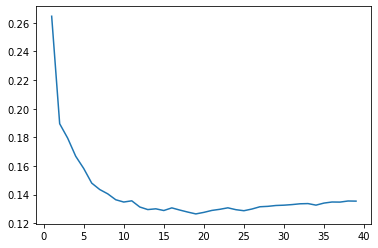

In [60]:
plt.plot(k,test)


Text(0.5, 1.0, 'Elbow Curve for Test')

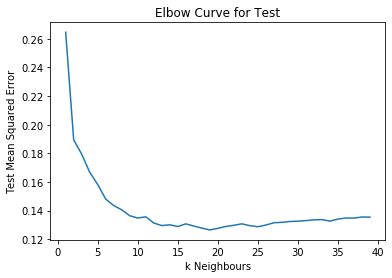

In [62]:
plt.plot(k,test)
plt.xlabel('k Neighbours')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for Test')

In [63]:

reg=KNN(n_neighbors=18)

#Fitting the model
reg.fit(train_x,train_y)

#Predicting over the train
test_predict=reg.predict(test_x)
k=mse(test_predict, test_y)
print('Test MSE   ', k)

Test MSE    0.12773348834634335
